# Cálculo de distancias en $R^3$


## Distancia euclideana

La distancia euclidiana o euclídea, es la distancia "ordinaria" entre dos puntos de un espacio euclídeo, la cual se deduce a partir del teorema de Pitágoras.

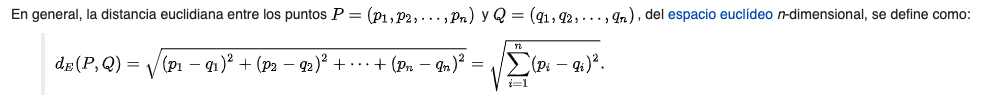

In [5]:
import numpy as np
import pandas as pd

ordenadores_df = pd.DataFrame({'RAM':[16, 8, 12],
                               'Nucleos_procesador':[8, 4, 8],
                               'Horas_autonomiaa':[8, 12, 7]},
                               index=['A','B', 'C'])

def distancia_euclidea(a, b):
    return np.sqrt(sum((abs(a) - abs(b))**2))
  
print(distancia_euclidea(ordenadores_df.iloc[0], ordenadores_df.iloc[1]))
print(distancia_euclidea(ordenadores_df.iloc[0], ordenadores_df.iloc[2]))
print(distancia_euclidea(ordenadores_df.iloc[1], ordenadores_df.iloc[2]))

9.797958971132712
4.123105625617661
7.54983443527075


## Distancia Manhattan

La distancia Manhattan nos dice que la distancia entre dos puntos es la suma de las diferencias absolutas de sus coordenadas. Es decir, es la suma de las longitudes de los dos catetos del triángulo rectángulo. Algo así como la longitud de cualquier escalera que suba desde (a,b) con el punto (c,d). Una ruta que une el punto (a,b) y el (c,d) a través de segmentos horizontales y verticales.

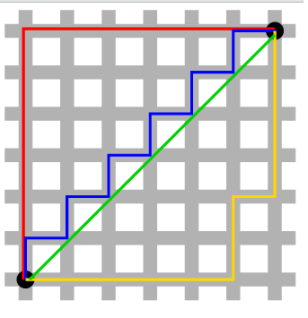




La distancia del taxista, $d_1$, entre dos vectores ${\displaystyle \mathbf {p} ,\mathbf {q} }$ en un espacio vectorial real n-dimensional con un sistema de coordenadas cartesianas fijo es la suma de las longitudes de las proyecciones del segmento de línea entre los puntos sobre el sistema de ejes coordenados. Más formalmente,

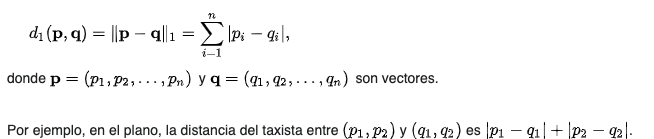

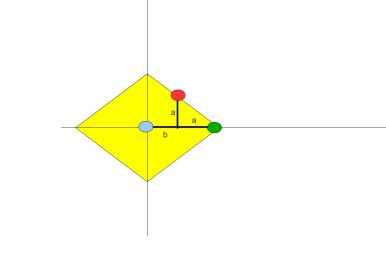

In [2]:
import pandas as pd

#Creamos el Dataframe, con tres ordenadores
#_________________________________________________________________________
ordenadores_df = pd.DataFrame({'RAM':[16, 8, 12],
                               'Nucleos_procesador':[8, 4, 8],
                               'Horas_autonomia':[8, 12, 7]})

#Creamos nuestra formula manhattan y la aplicamos a los tres ordenadores
#_________________________________________________________________________
def distancia_manhattan(a, b):
    return sum(abs(a - b))
  
print(distancia_manhattan(ordenadores_df.iloc[0], ordenadores_df.iloc[1])) # Distancia de 16
print(distancia_manhattan(ordenadores_df.iloc[0], ordenadores_df.iloc[2])) # Distancia de 5
print(distancia_manhattan(ordenadores_df.iloc[1], ordenadores_df.iloc[2])) # Distancia de 13

16
5
13


## Distancia Minkowski

Esta distancia puede considerarse una generalización de las distancias euclideas y Manhattan. Viene definida por la siguiente expresión:

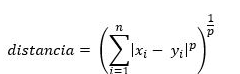

De esta forma si P=1 es la distancia Manhattan y si P=2 es la distancia Euclídea. Obviamente se usa para P>2

## Distancia de Malahanobis

Su utilidad radica en que es una forma de determinar la similitud entre dos variables aleatorias multidimensionales. Se diferencia de la distancia euclídea en que tiene en cuenta la correlación entre las variables aleatorias.

Formalmente, la distancia de Mahalanobis entre dos variables aleatorias con la misma distribución de probabilidad ${\displaystyle {\vec {x}}}$ y ${\displaystyle {\vec {y}}}$ con matriz de covarianza 
$\Sigma$ se define como:

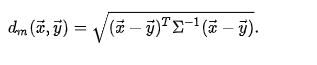

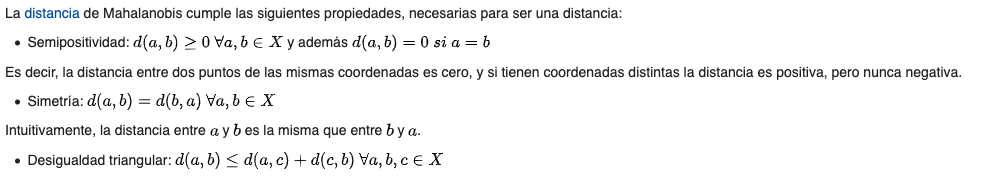

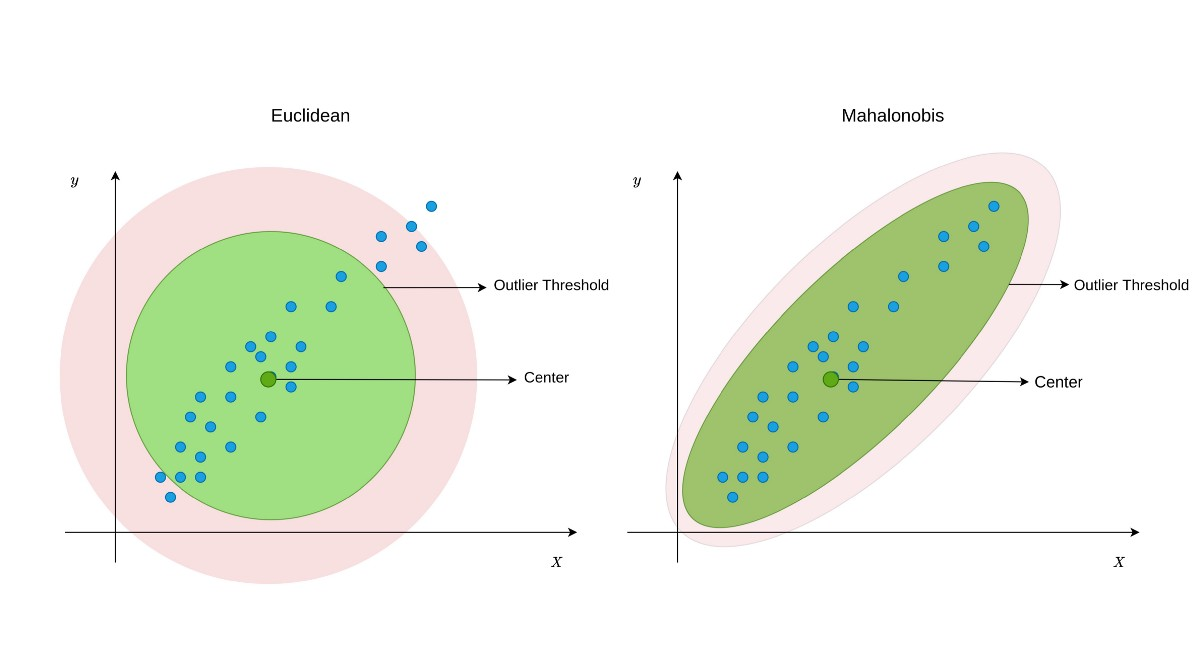

In [6]:
import numpy as np
import pandas as pd
import scipy as stats
  
# calculateMahalanobis function to calculate
# the Mahalanobis distance
def calculateMahalanobis(y=None, data=None, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()
  
# data
data = { 'Price': [100000, 800000, 650000, 700000, 
                   860000, 730000, 400000, 870000,
                   780000, 400000],
         'Distance': [16000, 60000, 300000, 10000, 
                      252000, 350000, 260000, 510000, 
                      2000, 5000],
         'Emission': [300, 400, 1230, 300, 400, 104,
                      632, 221, 142, 267],
         'Performance': [60, 88, 90, 87, 83, 81, 72, 
                         91, 90, 93],
         'Mileage': [76, 89, 89, 57, 79, 84, 78, 99, 
                     97, 99]
           }
  
# Creating dataset
df = pd.DataFrame(data,columns=['Price', 'Distance',
                                'Emission','Performance', 
                                'Mileage'])
  
# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
df['calculateMahalanobis'] = calculateMahalanobis(y=df, data=df[[
  'Price', 'Distance', 'Emission','Performance', 'Mileage']])
  
# Display the dataframe
print(df)

    Price  Distance  Emission  Performance  Mileage  calculateMahalanobis
0  100000     16000       300           60       76              6.055764
1  800000     60000       400           88       89              2.579063
2  650000    300000      1230           90       89              6.762529
3  700000     10000       300           87       57              7.482670
4  860000    252000       400           83       79              2.027900
5  730000    350000       104           81       84              2.380654
6  400000    260000       632           72       78              2.147466
7  870000    510000       221           91       99              4.915337
8  780000      2000       142           90       97              4.025548
9  400000      5000       267           93       99              6.623069
